## Load the dataset

In [ ]:
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (assuming it is a CSV file)
df = pd.read_csv('/kaggle/input/car-reviews/car_reviews.csv')

ParserError: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.


In [ ]:
#bCheck if the 'Review' column exists
if 'Review' not in df.columns:
    raise KeyError("The dataset does not contain a column named 'Review'.")

## Initialize models

In [ ]:
# Step 2: Initialize the zero-shot classification model and sentiment analysis model
zero_shot_classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", device=0)
sentiment_classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", device=0)

In [ ]:
#  Define the classes for zero-shot classification
classes = ["talks about driving experience", "talks about features", "talks about value for money",
           "talks about issues", "other"]

## Function to preprocess text


In [ ]:
# Function to preprocess text (truncate to max token length)
def preprocess_text(text, tokenizer, max_length=512):
    tokens = tokenizer.encode_plus(text, truncation=True, max_length=max_length)
    return tokenizer.decode(tokens['input_ids'])

## Classify each review and detect sentiment

In [ ]:
# Classify each review and detect sentiment
def classify_and_analyze_sentiment(review):
    # Preprocess the review text
    preprocessed_review = preprocess_text(review, zero_shot_classifier.tokenizer)

    classification = zero_shot_classifier(preprocessed_review, classes)
    sentiment = sentiment_classifier(preprocessed_review)

    # Get the highest scoring class and sentiment
    talk_about = classification['labels'][0]
    sentiment_label = sentiment[0]['label']

    return pd.Series([talk_about, sentiment_label])

## Apply the function to the dataset and create new columns

In [ ]:
# Apply the function to the dataset and create new columns
df[['talks about', 'sentiment']] = df['Review'].apply(
    lambda x: classify_and_analyze_sentiment(x[:512])  # Ensure input is truncated.
)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [ ]:
# Save the modified dataset
df.to_csv('reviews_with_classification_and_sentiment.csv', index=False)

## Visualize the sentiment spread

### review category

#### Bar Garaphs

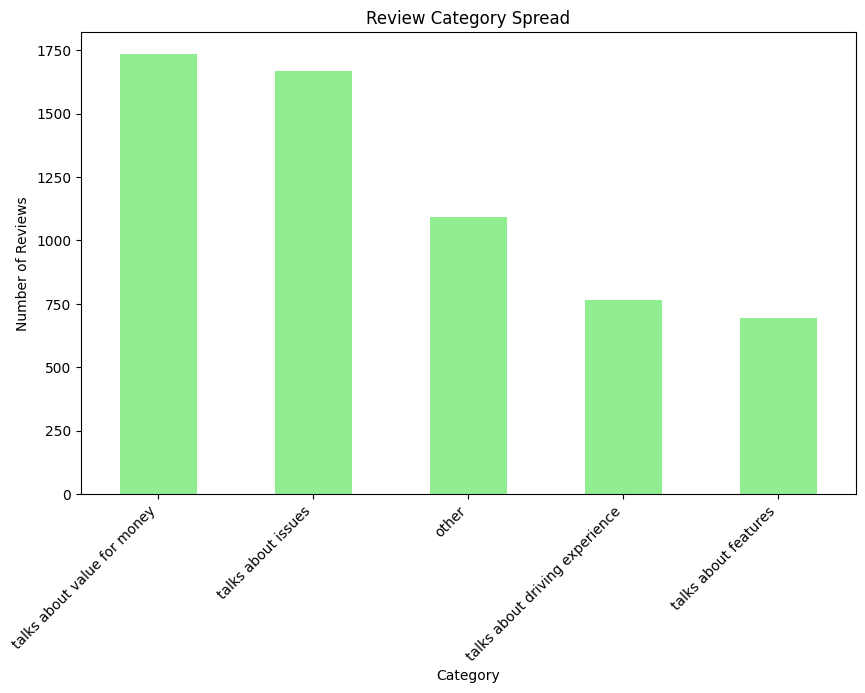

In [ ]:
# Visualize the spread of the review category
category_counts = df['talks about'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='lightgreen')
plt.title('Review Category Spread')
plt.xlabel('Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()


#### Pie Chart

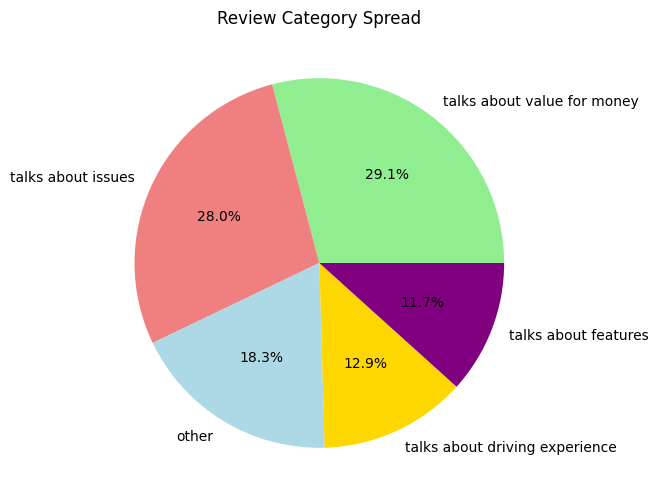

In [ ]:
# Visualize the spread of the review category
category_counts = df['talks about'].value_counts()

plt.figure(figsize=(10, 6))
category_colors = ['lightgreen', 'lightcoral', 'lightblue', 'gold', 'purple']
category_counts.plot(kind='pie', autopct='%1.1f%%', colors=category_colors)
plt.title('Review Category Spread')
plt.ylabel('')
plt.show()

### total sentiment spread

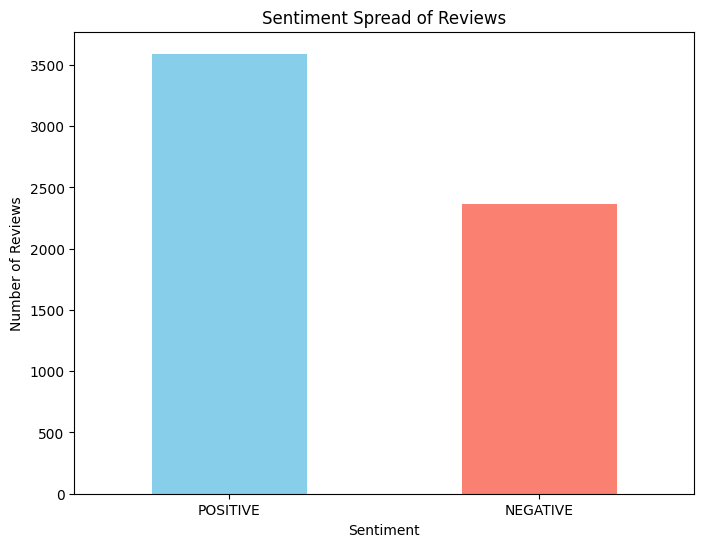

In [ ]:
# Visualize the sentiment spread
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Sentiment Spread of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

### sentiment spread within "talks about driving experience" category

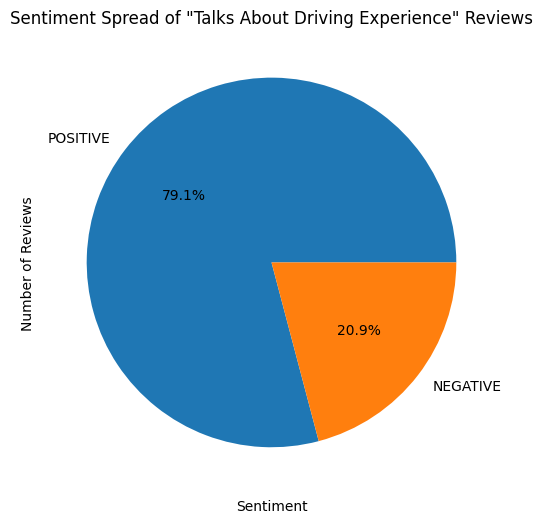

In [ ]:
# Visualize the sentiment spread within "talks about driving experience" category
driving_experience_reviews = df[df['talks about'] == "talks about driving experience"]
sentiment_counts_driving_experience = driving_experience_reviews['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts_driving_experience.plot(kind='pie', autopct='%1.1f%%', color=['skyblue', 'salmon'])
plt.title('Sentiment Spread of "Talks About Driving Experience" Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

### sentiment spread within "talks about driving experience" category

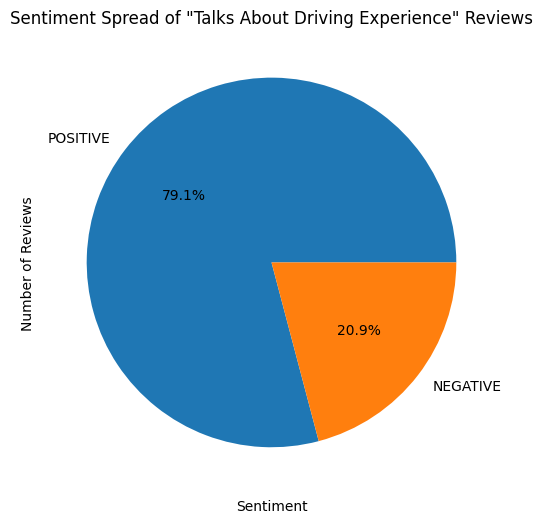

In [ ]:
# Visualize the sentiment spread within "talks about driving experience" category
driving_experience_reviews = df[df['talks about'] == "talks about driving experience"]
sentiment_counts_driving_experience = driving_experience_reviews['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts_driving_experience.plot(kind='pie', autopct='%1.1f%%', color=['skyblue', 'salmon'])
plt.title('Sentiment Spread of "Talks About Driving Experience" Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()